In [40]:
import datashader as ds
import datashader.transfer_functions as tf
import numpy as np
import pandas as pd

In [61]:
df=pd.read_csv('./Euro_pop_density/EU_DEN.csv')
df.tail()

,TOT_P,UNITS,NLAT,ELON,CNTR_CODE,METHD_CL,YEAR,DATA_SRC
2026597,327,1km,1387,4558,IT,M,2011,IT
2026598,369,1km,1387,4559,IT,M,2011,IT
2026599,2317,1km,1387,4560,IT,M,2011,IT
2026600,67,1km,1387,4561,IT,M,2011,IT
2026601,1,1km,1387,4562,IT,M,2011,IT


In [62]:
df['NLAT'] = df['NLAT'].astype(float)
df['ELON'] = df['ELON'].astype(float)
df['TOT_P'] = df['TOT_P'].astype(float)
df.dtypes

TOT_P        float64
UNITS         object
NLAT         float64
ELON         float64
CNTR_CODE     object
METHD_CL      object
YEAR           int64
DATA_SRC      object
dtype: object

In [36]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

In [37]:
background = "black"
export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

/Users/moshiour/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


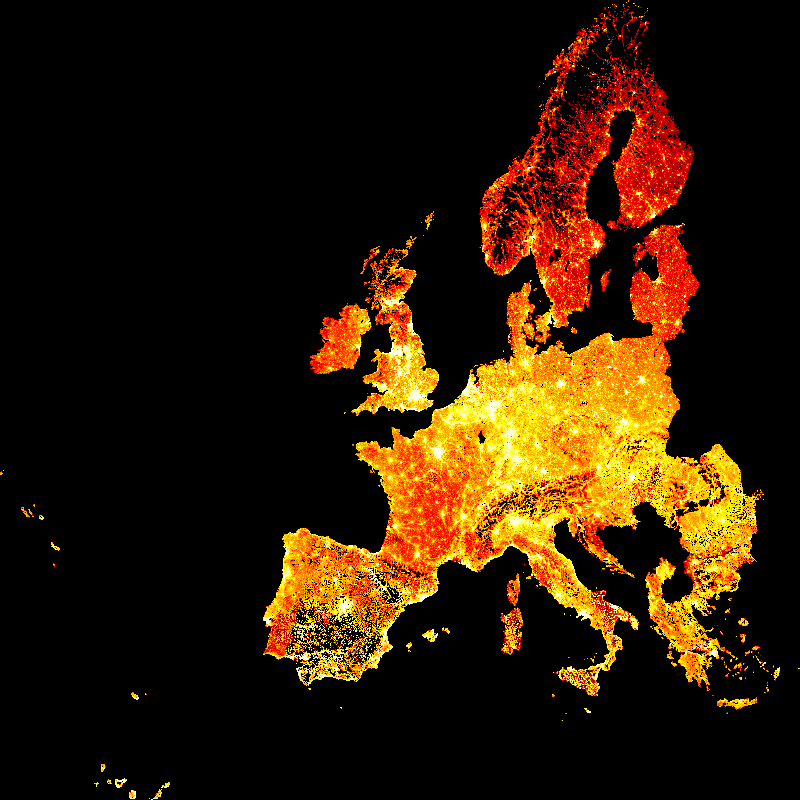

In [63]:
cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(df, 'ELON', 'NLAT', ds.mean('TOT_P'))
img = tf.interpolate(agg, cmap=['lightblue', 'darkblue'], how='log')
export(tf.shade(agg, cmap = cm(Hot,0.2), how='eq_hist'),"census_EU_2011_hot_eq_hist")

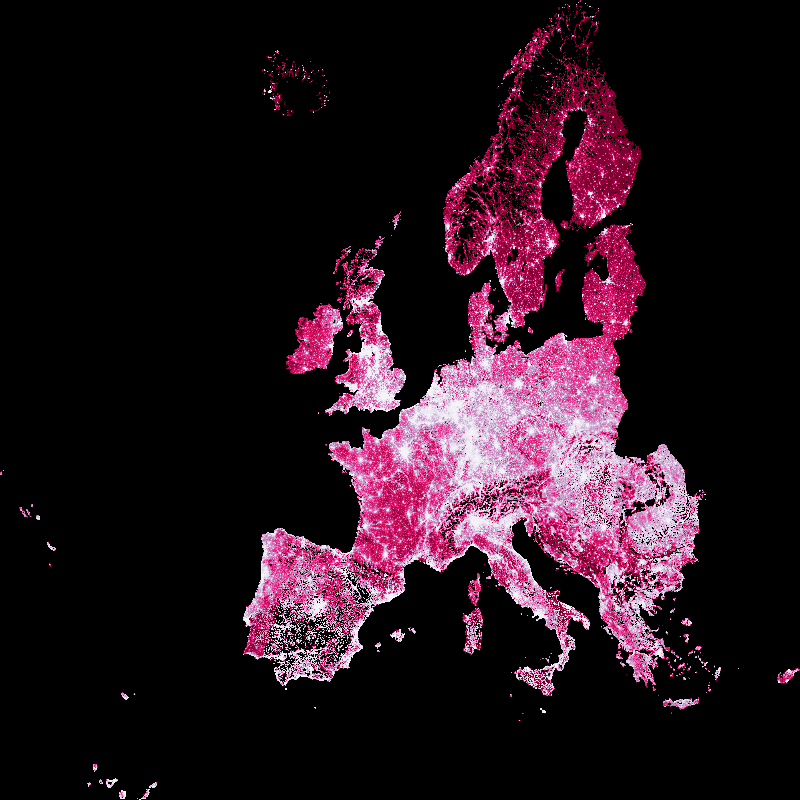

In [59]:
from bokeh.palettes import PuRd9
export(tf.shade(agg, cmap=cm(PuRd9), how='eq_hist'),"census_EU_2011_inferno_eq_hist")

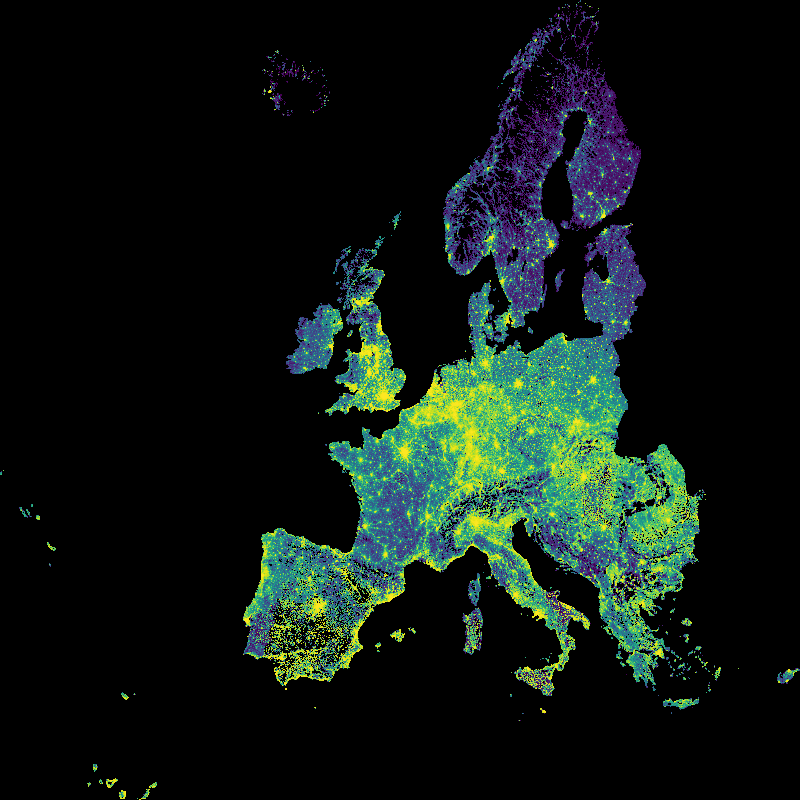

In [60]:
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"census_EU_all_2011_viridis_eq_hist")

In [64]:
adf=pd.read_csv('./Euro_pop_density/EU_DEN_all.csv')
adf.tail()

,TOT_P,UNITS,NLAT,ELON,CNTR_CODE,METHD_CL,YEAR,DATA_SRC
2108404,3,1km,2311,5370,RS,D,2011,JRC
2108405,2,1km,2312,5370,RS,D,2011,JRC
2108406,5,1km,2311,5371,RS,D,2011,JRC
2108407,4,1km,2313,5372,RS,D,2011,JRC
2108408,4,1km,2313,5373,RS,D,2011,JRC


In [65]:
adf['NLAT'] = adf['NLAT'].astype(float)
adf['ELON'] = adf['ELON'].astype(float)
adf['TOT_P'] = adf['TOT_P'].astype(float)
adf.dtypes

TOT_P        float64
UNITS         object
NLAT         float64
ELON         float64
CNTR_CODE     object
METHD_CL      object
YEAR           int64
DATA_SRC      object
dtype: object

/Users/moshiour/anaconda3/lib/python3.5/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


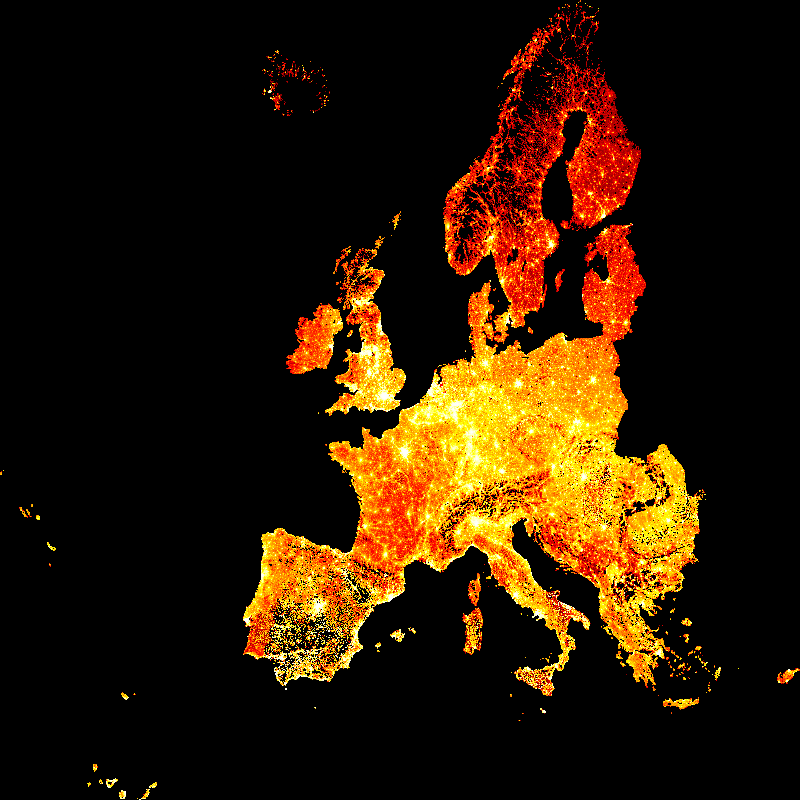

In [66]:
cvs = ds.Canvas(plot_width=800, plot_height=800)
agg = cvs.points(adf, 'ELON', 'NLAT', ds.mean('TOT_P'))
img = tf.interpolate(agg, cmap=['lightblue', 'darkblue'], how='log')
export(tf.shade(agg, cmap = cm(Hot,0.2), how='eq_hist'),"census_JRF_2011_all_hot_eq_hist")

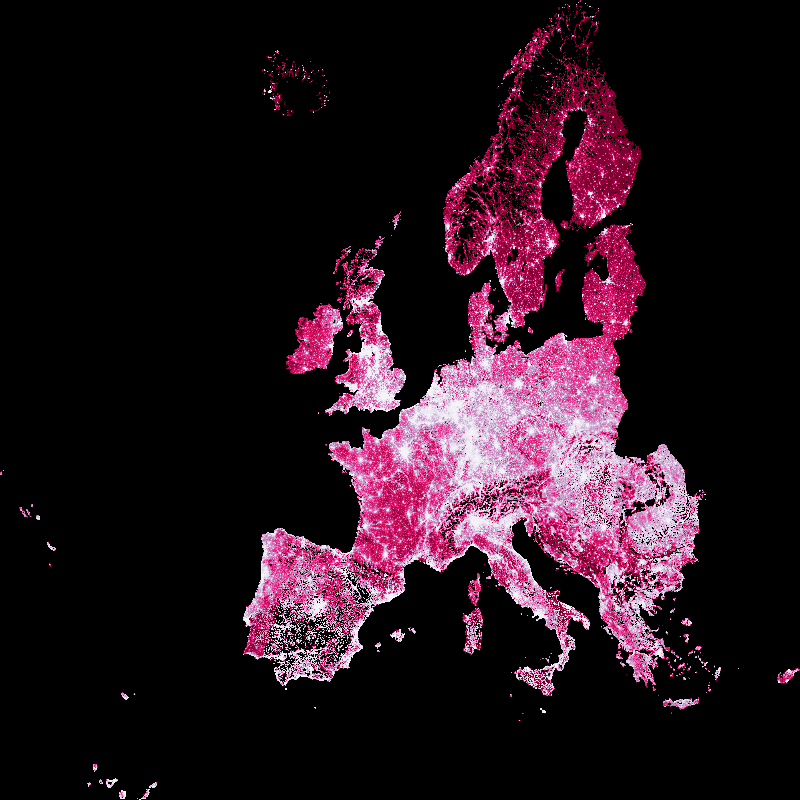

In [67]:
from bokeh.palettes import PuRd9
export(tf.shade(agg, cmap=cm(PuRd9), how='eq_hist'),"census_EU_all_2011_inferno_eq_hist")

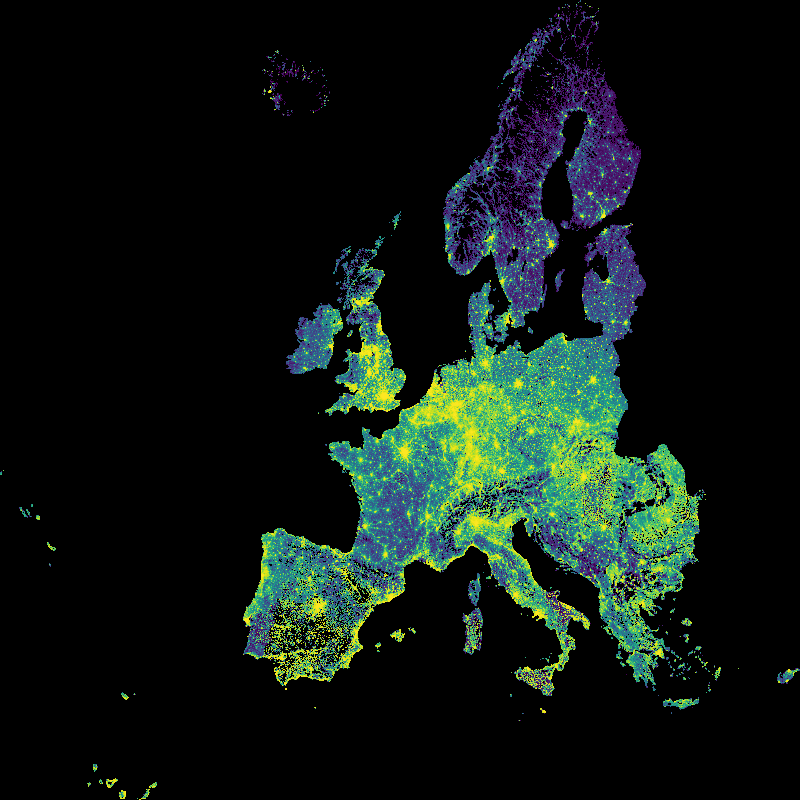

In [68]:
export(tf.shade(agg, cmap=cm(viridis), how='eq_hist'),"census_EU_all_2011_viridis_eq_hist")